In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression, chi2, SelectPercentile, mutual_info_regression
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
folder = ""
raw = folder + "raw_data/"
SEED = 4426008 #np.random.randint(2**32)
np.random.seed(SEED)

In [3]:
def full_X(x_tr = None, x_ts = None):
  if x_tr is None:
    x_tr = x_train
  if x_ts is None:
    x_ts = x_test
  return pd.concat([x_tr, x_ts], join = "inner")

In [4]:
just_scoring = False
if just_scoring:
  folder = folder + "just_scoring/"
  raw_dataset_x = pd.read_csv(raw + 'X_train.csv',index_col=['id'])
  raw_dataset_y = pd.read_csv(raw + 'y_train.csv',index_col=['id'])
  x_train, x_test, y_train, y_test = train_test_split(raw_dataset_x, raw_dataset_y, test_size=0.2, random_state = 100)
else:
  folder = folder + "testing/"
  x_train = pd.read_csv(raw + 'X_train.csv',index_col=['id'])
  x_test = pd.read_csv(raw + 'X_test.csv',index_col=['id'])
  y_train = pd.read_csv(raw + 'y_train.csv',index_col=['id'])
  y_test = pd.DataFrame({'A' : []})

preprocessed = folder + "nan_filled/"
x_train.columns = [str(col) for col in x_train.columns]
x_test.columns = [str(col) for col in x_train.columns]

In [5]:
print((x_train.columns[x_train.nunique(dropna = False) <= 2]))
x_test = x_test.drop(columns = x_train.columns[x_train.nunique(dropna = False) <= 2])
x_train = x_train.drop(columns = x_train.columns[x_train.nunique(dropna = False) <= 2])

Index(['x104', 'x129', 'x489', 'x530'], dtype='object')


In [6]:
nans_train = x_train[x_train.columns].isna().astype(int)
nans_train = nans_train.add_prefix("isnan_")
nans_test = x_test[x_test.columns].isna().astype(int)
nans_test = nans_test.add_prefix("isnan_")

In [7]:
s = MinMaxScaler()
s.fit(full_X())
x_train[[col for col in x_train.columns]] = s.transform(x_train)
x_test[[col for col in x_train.columns]] = s.transform(x_test)

In [8]:
n = full_X().shape[0]
imputer = KNNImputer(n_neighbors=np.floor(np.sqrt(n)).astype(int))
imputer.fit(np.array(full_X()))
x_train_new = pd.DataFrame(imputer.transform(np.array(x_train)), columns = x_train.columns, index = x_train.index)
x_test_new = pd.DataFrame(imputer.transform(np.array(x_test)), columns = x_test.columns, index = x_test.index)

In [9]:
x_train_new.to_csv(preprocessed + 'X_train_preprocessed.csv',index_label="id")
x_test_new.to_csv(preprocessed + 'X_test_preprocessed.csv',index_label="id")
y_train.to_csv(preprocessed + 'y_train_preprocessed.csv',index_label="id")
y_test.to_csv(preprocessed + 'y_test_preprocessed.csv',index_label="id")

In [10]:
nans_train.to_csv(preprocessed + 'nans_train_preprocessed.csv',index_label="id")
nans_test.to_csv(preprocessed + 'nans_test_preprocessed.csv',index_label="id")

In [11]:
x_train

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
id,,,,,,,,,,,,,,,,,,,,,
0.0,0.376913,0.340527,0.388683,0.397810,0.232290,0.372033,0.604670,0.866437,0.837880,0.506089,...,NaN,0.396691,0.478166,0.507531,0.208580,0.322499,0.499217,0.313129,0.007176,0.415996
1.0,0.535423,NaN,0.596678,0.380005,NaN,0.484857,0.451109,0.826537,0.075816,0.671939,...,NaN,0.581589,0.429065,0.632476,0.343784,0.414930,0.316127,NaN,0.125644,0.769285
2.0,0.379468,0.387313,NaN,0.815553,0.048442,0.374921,NaN,0.492258,NaN,0.585959,...,0.528820,0.474764,0.401651,0.361905,0.939242,0.458741,0.568061,0.126241,0.487619,0.454439
3.0,0.138242,0.056309,0.078933,0.480827,0.478381,0.517454,0.456172,0.499437,0.525066,0.487488,...,0.479768,0.101508,0.115183,0.502781,0.481703,0.083695,0.517537,0.147521,0.483087,NaN
4.0,0.360665,0.590690,0.413108,0.367245,0.369185,0.420949,0.402493,0.750710,0.618902,0.750088,...,0.493124,0.464957,NaN,NaN,0.035203,0.467639,0.504232,0.441124,0.712446,0.435747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207.0,0.577408,0.621674,0.513167,0.667672,0.944122,0.452748,0.627851,0.803883,0.950149,NaN,...,0.245364,0.655093,0.609495,0.478265,0.220753,0.565357,0.674835,0.382541,NaN,0.534203
1208.0,0.506762,0.490724,0.422199,0.453669,0.041064,0.644224,0.593810,0.231647,0.687472,0.507629,...,0.301385,0.510582,0.440283,0.576398,0.984685,0.571372,0.609470,0.498402,0.266925,0.607307
1209.0,0.381148,0.227847,0.458842,0.501994,0.255628,0.557399,0.331272,0.661750,0.623282,0.493084,...,0.518843,0.534859,0.467641,0.188009,0.164449,0.361495,NaN,0.608798,0.663379,0.563934


In [12]:
%%time
# s = RobustScaler()
# s.fit(full_X())
# x_train[[col for col in x_train.columns]] = s.transform(x_train)
# x_test[[col for col in x_train.columns]] = s.transform(x_test)

n = x_train.shape[0]
m = full_X().shape[0]
ks = np.floor(np.array([3, np.sqrt(m)])).astype(int) #np.log(n), np.sqrt(n)/2, 
results = np.zeros(ks.size)
unscaled_results = np.zeros(ks.size)
for j, k_nei in enumerate(ks):
  print(j)
  imputer = KNNImputer(n_neighbors=k_nei)
  imputer.fit(np.array(x_train))
  #x_train_new = pd.DataFrame(imputer.transform(np.array(x_train)), columns = x_train.columns, index = x_train.index)
  #x_test_new = pd.DataFrame(imputer.transform(np.array(x_test)), columns = x_test.columns, index = x_test.index)

  result = np.zeros([1, x_test.columns.shape[0]])
  for col in x_test.columns:
    i = x_test.columns.get_loc(col)
    x_test_knn = x_test.copy()
    x_test_knn[col] = np.NaN
    x_test_knn = pd.DataFrame(imputer.transform(np.array(x_test_knn)), columns = x_test.columns, index = x_test.index)
    result[0, i] = (((x_test - x_test_knn)**2)).mean()[col]
  s = StandardScaler(with_mean = False)
  s.fit(np.array(x_test))
  results[j] = np.mean(s.transform(np.array(result)))
  unscaled_results[j] = np.mean(result)


0
1
CPU times: total: 1h 42min 48s
Wall time: 31min 7s


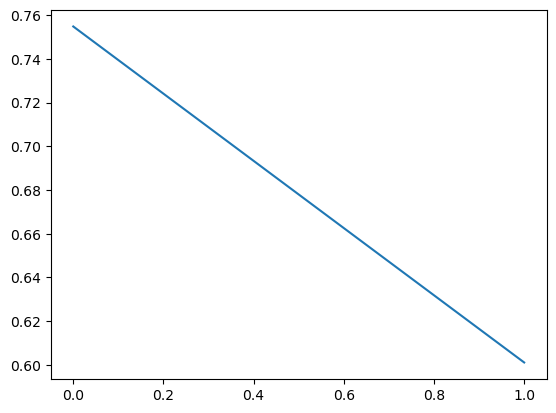

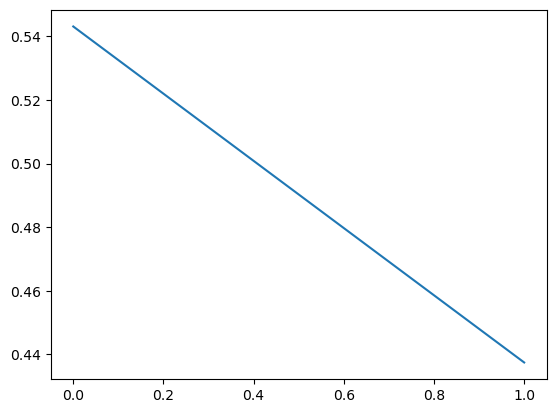

[0.75486828 0.60104642]
[0.54313646 0.43745516]
[ 3 44]


In [13]:
import matplotlib.pyplot as plt
plt.plot(results)
plt.show()
plt.plot(unscaled_results)
plt.show()
print(results)
print(unscaled_results)
print(ks)

In [14]:
# def mylambda(_ = None, xscx = None, sxsdc=None, col=None):
#   #print(col)
#   i = x_test.columns.get_loc(col)
#   x_test_knn = x_test.copy()
#   x_test_knn[col] = np.NaN
#   x_test_knn = pd.DataFrame(imputer.transform(np.array(x_test_knn)), columns = x_test.columns, index = x_test.index)
#   result[0, i] = (((x_test - x_test_new)**2)).mean()[col]
#   #print(i)

# # result = np.empty([1, x_test.columns.shape[0]])
# # [x_test.apply(mylambda, col=coli) for coli in x_test.columns]